<a href="https://colab.research.google.com/github/Stalkerar/ALG-II-Semestr-prace/blob/main/Cluster_VON0074.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projekt shlukování dat, **Wine** datasetu

*   Cvičící Ing. Radek Svoboda
*   VŠB, Ostrava 2022
*   Ondřej Vondrák (VON0074)

Data source: https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

About dataset:
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:

*   Alcohol
*   Malic acid
*   Ash
*   Alcalinity of ash
*   Magnesium
*   Total phenols
*   Flavanoids
*   Nonflavanoid phenols
*   Proanthocyanins
*   Color intensity
*   Hue
*   OD280/OD315 of diluted wines
*   Proline










**Description:** Načtení potřebných knihoven.

In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use
from matplotlib.gridspec import GridSpec
import plotly.express as py
import scipy
from IPython.display import display, HTML

import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering, DBSCAN

**Description:** Načtení datasetu do dataframu.

In [11]:
df = pd.read_csv('wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Description:** Datové typy jednotlivých sloupců.

In [12]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [13]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


**Description:** Kontrola úplnosti dat v datasetu.

In [14]:
df.isna().sum().sort_values(ascending=False)[:10]

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
dtype: int64

**Insight gained:** Nechybí žádná data není třeba nic odstranit. 

**Description:** Kontrola duplikátních dat v datasetu.

In [15]:
df.duplicated().sum()

0

**Insight gained:** V datasetu se nenachází žádné duplikátní data.



**Description:** Korelace a vizualizace dat. 

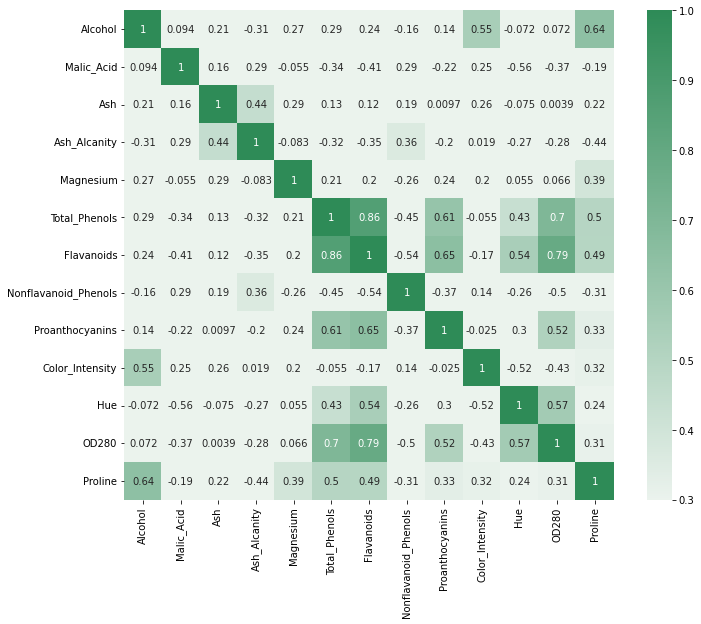

In [16]:
df_corr = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(df_corr, square=True, cmap=sns.light_palette("seagreen", as_cmap=True), vmin=0.3, annot=True)

**Description:** Průměrný obsah alkoholu ve vínech.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


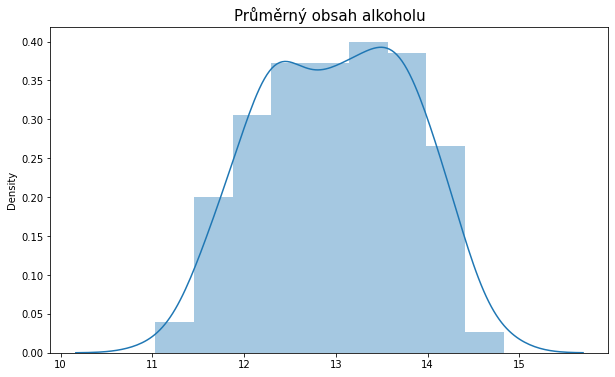

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(x = df["Alcohol"])
plt.title("Průměrný obsah alkoholu", size=15)
plt.show()

**Insight gained:** Na grafu vidíme, že průměrný obsah alkoholu ve vínech je zhruba 12,5% - 14%.

**Description:** Vazba alkoholu na intezitu barvy.

Text(0, 0.5, 'Color_Intensity')

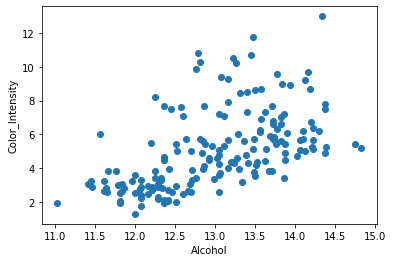

In [20]:
plt.scatter(df['Alcohol'],df['Color_Intensity'])
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')

**Insight gained:** Na grafu lze pozorovat lehký náznak přímé úměry, kde s výšším obsahem alkoholu stoupá i intezita barvy ale výsledky nejsou natolik přesvědčívé na vyvození pevného závěru.

**Description:** Nejčastější odstín vína.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


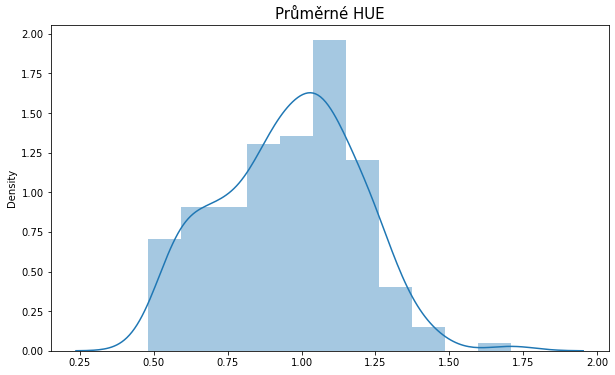

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(x = df["Hue"])
plt.title("Průměrné HUE", size=15)
plt.show()

**Insight gained:** Nejvíce převládají odstíny od 1.1 - 1.15 HUE.

**Description:** Ověření vazby mezi alkoholem a odstínem.

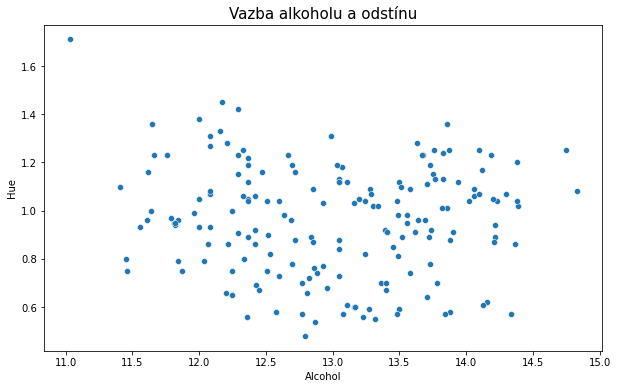

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Alcohol", y="Hue", data=df)
plt.title("Vazba alkoholu a odstínu", size=15)
plt.show()

**Insight gained:** Z grafu je patrné, že není žádná zavislost na barvě a obsahem alkoholu. 

**Description:** Nejčastější počet magnézia.

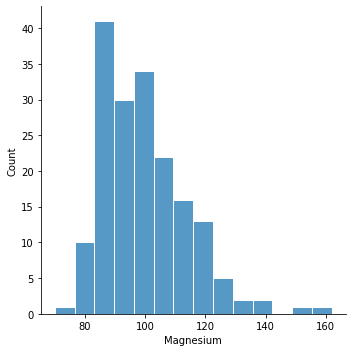

In [24]:
sns.displot(data=df, x='Magnesium', edgecolor='white')

**Insight gained:**  Vidíme, že nejčastější počet magnézia je od 90 do 100 jednotek.

**Description:** Rozdílnost v obsahu popelu v půdě.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


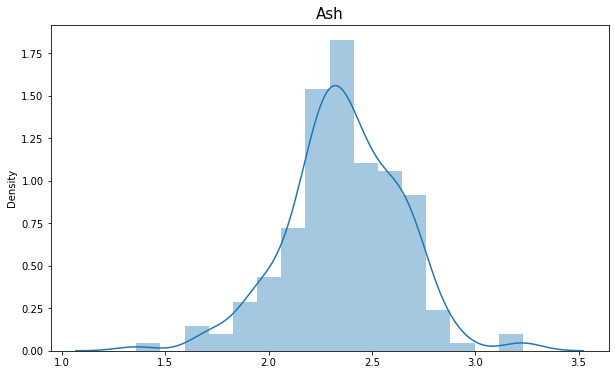

In [27]:

plt.figure(figsize=(10,6))
sns.distplot(x = df["Ash"])
plt.title("Ash", size=15)
plt.show()

**Insight gained:** Z grafu lze vidět, že ikdyž byly vzorky odebrány ze 3 různých pěstíren, půdní profil je u všech podobný.

**Description:** Průměrný obsah fenolů.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


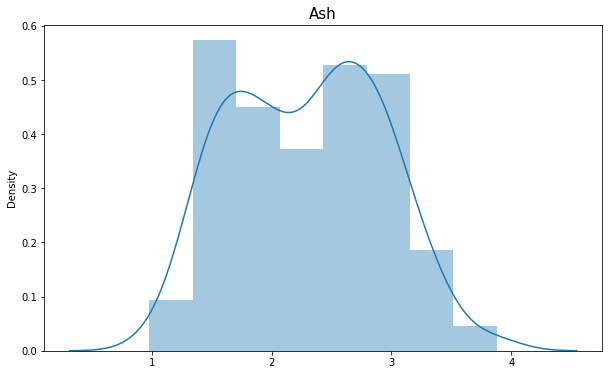

In [28]:
plt.figure(figsize=(10,6))
sns.distplot(x = df["Total_Phenols"])
plt.title("Ash", size=15)
plt.show()

**Insight gained:** Lze vidět, že jsou zde dva rozdílné průměry, to by mohlo naznačovat možnou odlišnost mezi jednotlivými pěstírnami.

**Description:** Kopírování datasetu pro clustering.

In [29]:
df_clustering = df.copy()
df_clustering.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [30]:
df_clustering.shape

(178, 13)

In [31]:
df_clustering.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [32]:
df_clustering.describe(include=np.number)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**Describe:** Použití one-hot encoding.

In [92]:
df_encoded = pd.get_dummies(df_clustering)

In [93]:
df_encoded.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
cluster_id                int64
dtype: object

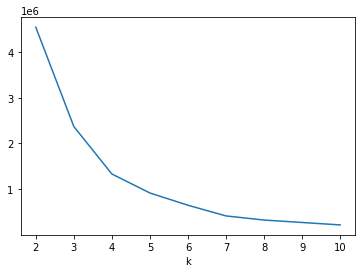

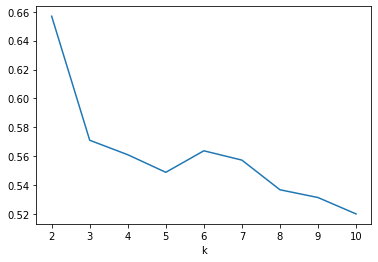

In [94]:
X = df_encoded.values
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')
df_clustering_scores.sse.plot()
plt.figure()
df_clustering_scores.silhouette.plot()

In [95]:
clustering = sklearn.cluster.KMeans(n_clusters=3)
clustering.fit(X)

KMeans(n_clusters=3)

In [96]:
pd.Series(clustering.labels_).value_counts()

2    69
1    62
0    47
dtype: int64

In [97]:
df_clustering['cluster_id'] = clustering.labels_
df_clustering.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_id
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


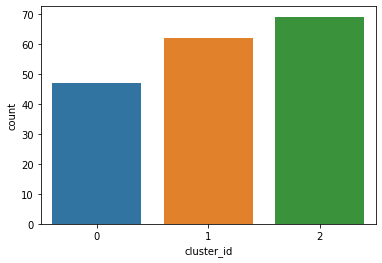

In [98]:
sns.countplot(data=df_clustering, x='cluster_id')

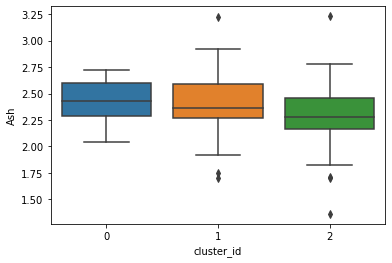

In [99]:
sns.boxplot(data=df_clustering, y='Ash', x='cluster_id')

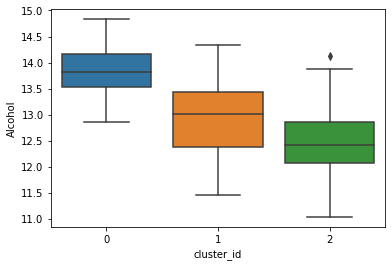

In [100]:
sns.boxplot(data=df_clustering, y='Alcohol', x='cluster_id')

In [101]:
with pd.option_context('display.max_columns', None):
    display(df_clustering.groupby('cluster_id').describe())

Alcohol                                                       \
             count       mean       std    min     25%     50%      75%   
cluster_id                                                                
0             47.0  13.804468  0.464331  12.85  13.535  13.820  14.1550   
1             62.0  12.929839  0.697101  11.45  12.370  13.005  13.4375   
2             69.0  12.516667  0.666996  11.03  12.070  12.420  12.8500   

                  Malic_Acid                                                 \
              max      count      mean       std   min    25%   50%     75%   
cluster_id                                                                    
0           14.83       47.0  1.883404  0.547874  1.35  1.655  1.73  1.8800   
1           14.34       62.0  2.504032  1.184280  0.94  1.615  2.26  3.3525   
2           14.13       69.0  2.494203  1.262772  0.74  1.510  2.13  3.4300   

                   Ash                                                      \
             max count      mean       std   min    25%    50%   75%   max   
cluster_id                                                                   
0           4.04  47.0  2.426170  0.190384  2.04  2.290  2.430  2.60  2.72   
1           5.65  62.0  2.408065  0.280952  1.70  2.265  2.365  2.59  3.22   
2           5.80  69.0  2.288551  0.300633  1.36  2.160  2.280  2.46  3.23   

           Ash_Alcanity                                                     \
                  count       mean       std   min   25%   50%   75%   max   
cluster_id                                                                   
0                  47.0  17.023404  2.999001  11.2  16.0  16.8  18.3  30.0   
1                  62.0  19.890323  2.746247  13.2  18.2  20.0  21.5  27.0   
2                  69.0  20.823188  3.166281  10.6  19.0  21.0  22.5  28.5   

           Magnesium                                                     \
               count        mean        std   min    25%    50%     75%   
cluster_id                                                                
0               47.0  105.510638  11.156734  89.0  97.50  102.0  112.00   
1               62.0  103.596774  16.607780  70.0  93.25  101.5  110.75   
2               69.0   92.347826  10.359460  78.0  86.00   88.0   98.00   

                  Total_Phenols                                           \
              max         count      mean       std   min     25%    50%   
cluster_id                                                                 
0           139.0          47.0  2.867234  0.366895  2.20  2.6000  2.850   
1           162.0          62.0  2.111129  0.582496  1.10  1.6575  1.965   
2           123.0          69.0  2.070725  0.562066  0.98  1.6300  2.000   

                       Flavanoids                                           \
             75%   max      count      mean       std   min     25%    50%   
cluster_id                                                                   
0           3.05  3.88       47.0  3.014255  0.420407  2.19  2.7150  2.980   
1           2.60  3.52       62.0  1.584032  0.960581  0.47  0.6925  1.265   
2           2.48  3.50       69.0  1.758406  0.850848  0.34  1.2500  1.750   

                        Nonflavanoid_Phenols                            \
              75%   max                count      mean       std   min   
cluster_id                                                               
0           3.295  3.93                 47.0  0.285319  0.067174  0.17   
1           2.590  3.75                 62.0  0.388387  0.135902  0.13   
2           2.250  5.08                 69.0  0.390145  0.123258  0.17   

                                      Proanthocyanins                      \
               25%   50%    75%   max           count      mean       std   
cluster_id                                                                  
0           0.2500  0.29  0.315  0.50            47.0  1.910426  0.443974   
1           0.282

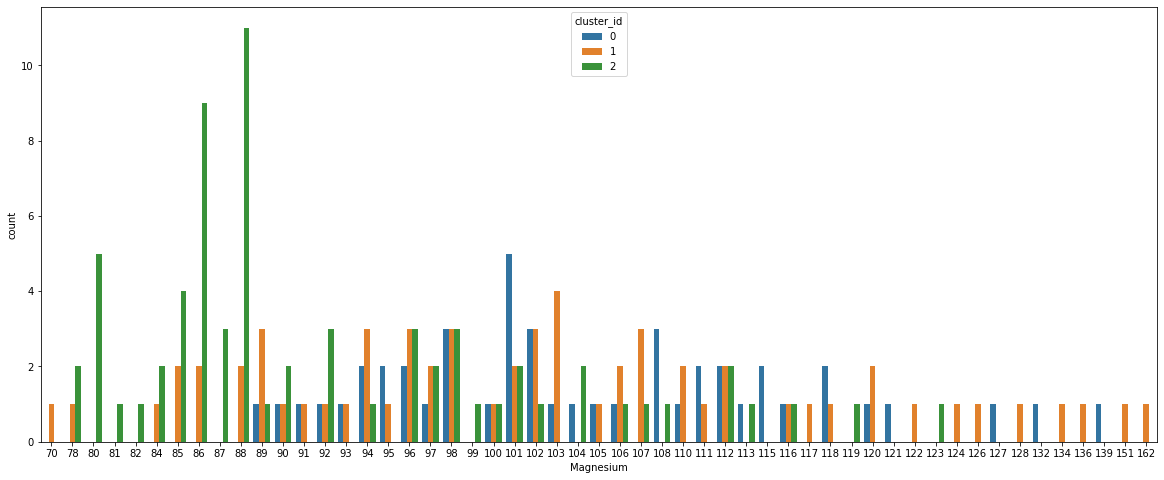

In [102]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_clustering, x='Magnesium', hue='cluster_id')

In [103]:
df_encoded.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_id
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [104]:
x=df_encoded.iloc[:,[2,3]].values

In [105]:
x.shape

(178, 2)

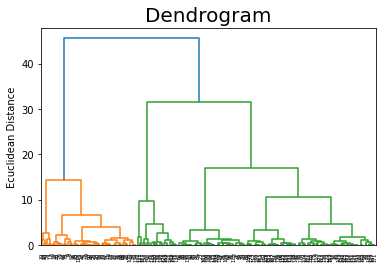

In [106]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram', fontsize = 20)
plt.ylabel('Ecuclidean Distance')
plt.show()

In [107]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)
pd.Series(hc.labels_).value_counts()

0    105
1     51
2     22
dtype: int64

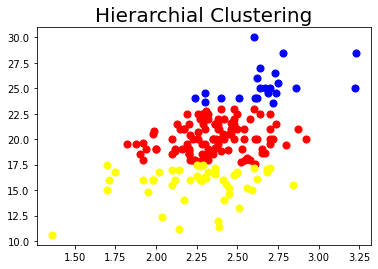

In [108]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'red')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'blue')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.show()

In [109]:
df_clustering['cluster_id'] = hc.labels_
df_clustering.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_id
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


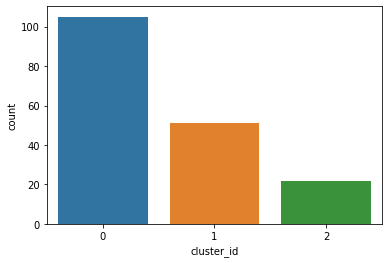

In [110]:
sns.countplot(data=df_clustering, x='cluster_id')

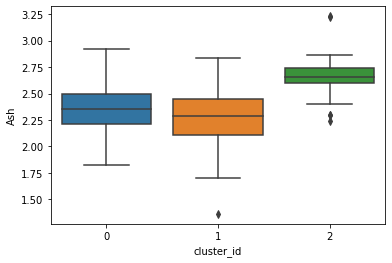

In [111]:
sns.boxplot(data=df_clustering, y='Ash', x='cluster_id')

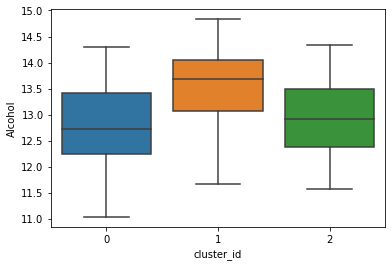

In [112]:
sns.boxplot(data=df_clustering, y='Alcohol', x='cluster_id')

In [113]:
with pd.option_context('display.max_columns', None):
    display(df_clustering.groupby('cluster_id').describe())

Alcohol                                                        \
             count       mean       std    min      25%     50%      75%   
cluster_id                                                                 
0            105.0  12.783143  0.749761  11.03  12.2500  12.720  13.4100   
1             51.0  13.496667  0.737807  11.66  13.0600  13.680  14.0400   
2             22.0  12.888636  0.792292  11.56  12.3825  12.915  13.4975   

                  Malic_Acid                                                \
              max      count      mean       std   min   25%   50%     75%   
cluster_id                                                                   
0           14.30      105.0  2.552762  1.189748  0.74  1.60  2.36  3.4500   
1           14.83       51.0  1.796275  0.680309  0.90  1.49  1.72  1.8650   
2           14.34       22.0  2.555455  1.189160  1.13  1.67  2.09  3.0975   

                    Ash                                                   \
             max  count      mean       std   min     25%    50%     75%   
cluster_id                                                                 
0           5.80  105.0  2.354381  0.224328  1.82  2.2100  2.350  2.5000   
1           3.99   51.0  2.263922  0.295209  1.36  2.1100  2.290  2.4500   
2           5.51   22.0  2.662273  0.244383  2.24  2.6025  2.655  2.7375   

                 Ash_Alcanity                                                 \
             max        count       mean       std   min   25%   50%     75%   
cluster_id                                                                     
0           2.92        105.0  20.122857  1.488240  17.6  19.0  20.0  21.500   
1           2.84         51.0  15.678431  1.685623  10.6  15.2  16.0  16.800   
2           3.23         22.0  25.345455  1.750300  23.5  24.0  25.0  25.875   

                 Magnesium                                                    \
             max     count        mean        std   min   25%    50%     75%   
cluster_id                                                                     
0           23.0     105.0   97.571429  13.589346  78.0  88.0   95.0  105.00   
1           17.5      51.0  103.862745  14.111016  78.0  95.5  101.0  111.50   
2           30.0      22.0  100.545455  16.285335  70.0  89.0   97.5  110.25   

                  Total_Phenols                                                \
              max         count      mean       std   min    25%   50%    75%   
cluster_id                                                                      
0           162.0         105.0  2.129524  0.603594  0.98  1.620  2.10  2.600   
1           151.0          51.0  2.698627  0.517938  1.61  2.410  2.70  3.000   
2           139.0          22.0  2.150000  0.551181  1.15  1.885  2.09  2.295   

                 Flavanoids                                                 \
             max      count      mean       std   min   25%    50%     75%   
cluster_id                                                                   
0           3.52      105.0  1.780000  0.915391  0.34  0.83  1.790  2.5500   
1           3.88       51.0  2.691176  0.821926  0.57  2.38  2.910  3.2050   
2           3.30       22.0  1.684545  1.073258  0.52  0.87  1.575  2.2125   

                 Nonflavanoid_Phenols                                        \
             max                count      mean       std   min   25%   50%   
cluster_id                                                                    
0           3.75                105.0  0.379714  0.122329  0.13  0.29  0.37   
1           3.93                 51.0  0.303725  0.103401  0.14  0.25  0.28   
2           5.08                 22.0  0.411364  0.136427  0.21  0.27  0.41   

                         Proanthocyanins                                    \
               75%   max           count      mean       std   min     25%   
cluster_id                                                                   
0

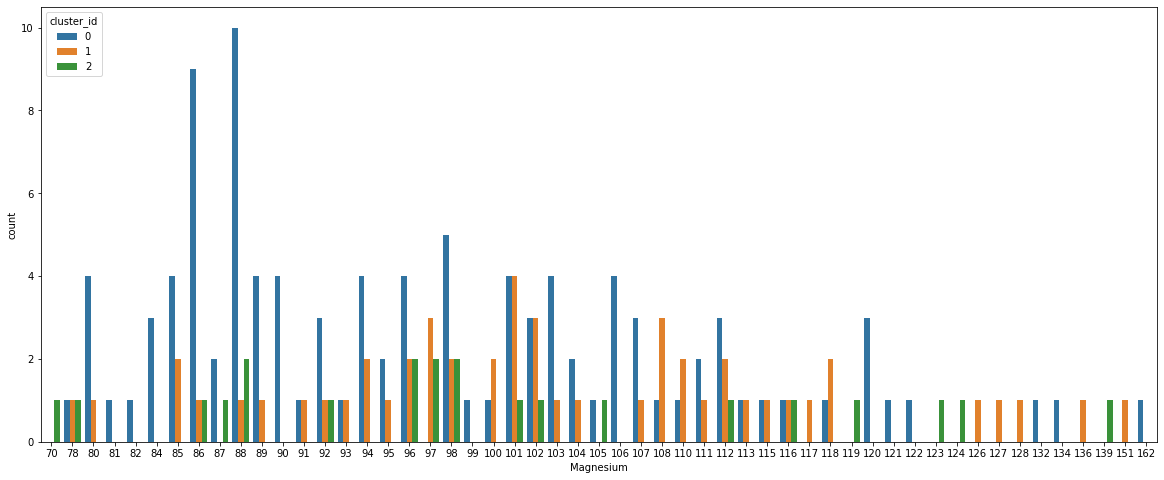

In [114]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_clustering, x='Magnesium', hue='cluster_id')